In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline


In [3]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url , sep = '\t')

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [5]:
items = chipo.item_name
letter_counts = Counter(items)
letter_counts

Counter({'Chicken Bowl': 726,
         'Chicken Burrito': 553,
         'Chips and Guacamole': 479,
         'Steak Burrito': 368,
         'Canned Soft Drink': 301,
         'Chips': 211,
         'Steak Bowl': 211,
         'Bottled Water': 162,
         'Chicken Soft Tacos': 115,
         'Chips and Fresh Tomato Salsa': 110,
         'Chicken Salad Bowl': 110,
         'Canned Soda': 104,
         'Side of Chips': 101,
         'Veggie Burrito': 95,
         'Barbacoa Burrito': 91,
         'Veggie Bowl': 85,
         'Carnitas Bowl': 68,
         'Barbacoa Bowl': 66,
         'Carnitas Burrito': 59,
         'Steak Soft Tacos': 55,
         '6 Pack Soft Drink': 54,
         'Chips and Tomatillo Red Chili Salsa': 48,
         'Chicken Crispy Tacos': 47,
         'Chips and Tomatillo Green Chili Salsa': 43,
         'Carnitas Soft Tacos': 40,
         'Steak Crispy Tacos': 35,
         'Chips and Tomatillo-Green Chili Salsa': 31,
         'Steak Salad Bowl': 29,
         'Nantucket N

In [6]:
df = pd.DataFrame.from_dict(letter_counts , orient = 'index')
df

,0
Chips and Fresh Tomato Salsa,110
Izze,20
Nantucket Nectar,27
Chips and Tomatillo-Green Chili Salsa,31
Chicken Bowl,726
Side of Chips,101
Steak Burrito,368
Steak Soft Tacos,55
Chips and Guacamole,479
Chicken Crispy Tacos,47


In [7]:
df = df[0].sort_values(ascending = False)[0:5]


In [8]:
df

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: 0, dtype: int64

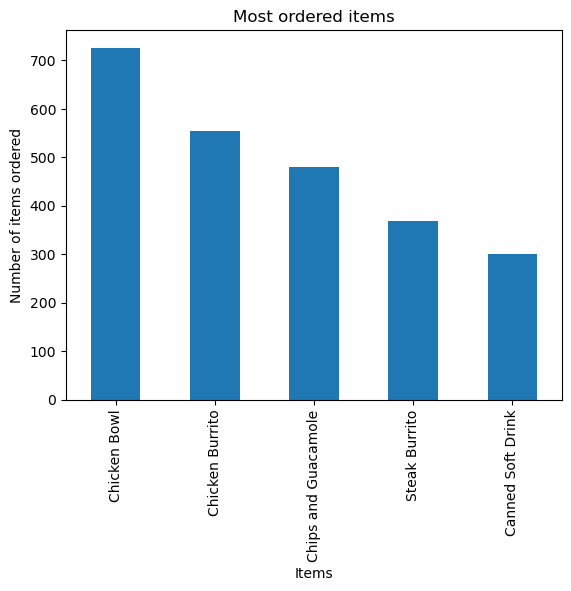

In [9]:
df.plot(kind = 'bar')
plt.xlabel('Items')
plt.ylabel('Number of items ordered')
plt.title('Most ordered items')
plt.show()

In [10]:
chipo.item_price

0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: object

In [11]:
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price]
chipo.item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [14]:
orders = chipo.groupby('order_id').sum()

In [15]:
orders

,quantity,item_name,choice_description,item_price
order_id,,,,
1,4,Chips and Fresh Tomato SalsaIzzeNantucket Nect...,[Clementine][Apple],11.56
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
3,2,Chicken BowlSide of Chips,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",12.67
4,2,Steak BurritoSteak Soft Tacos,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",21.00
5,2,Steak BurritoChips and Guacamole,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",13.70
...,...,...,...,...
1830,2,Steak BurritoVeggie Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",23.00
1831,3,Carnitas BowlChipsBottled Water,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",12.90
1832,2,Chicken Soft TacosChips and Guacamole,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",13.20


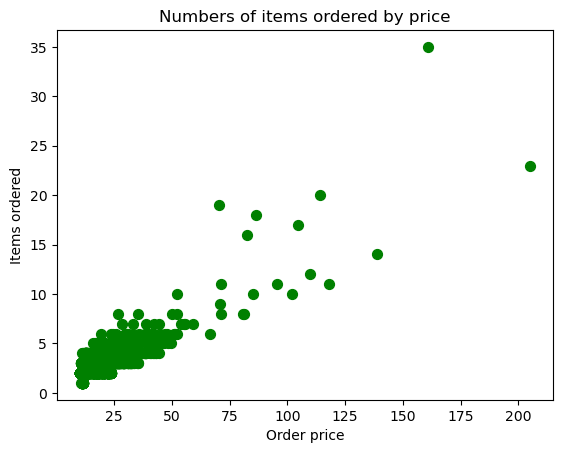

In [18]:
plt.scatter(x = orders.item_price , y = orders.quantity , s= 50 , c = 'green')
plt.xlabel('Order price')
plt.ylabel('Items ordered')
plt.title('Numbers of items ordered by price')
plt.show()
